# Face Detection And Recognition using OpenCV and deep learning

Shivansh Kumar 101803103 COE6 </br>
Harmeet Singh 101803104 COE6 </br>
Amogh Mittal 101803115 COE6

# **Face Detection Using Deep learning**

In [ ]:
pip install mtcnn # Multi-Task Cascaded Convolutional Neural Network

     |████████████████████████████████| 2.3MB 2.1MB/s 


Test image :


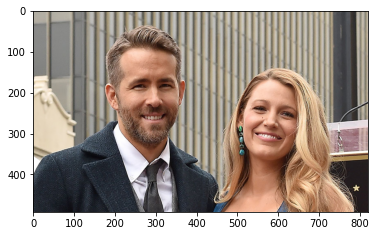

In [26]:
# Face detection with MTCNN on the test image
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN

filename = 'test_img.jpg'
img_pixel = plt.imread(filename)

data = plt.imread(filename)
print("Test image :")
plt.imshow(data)

In [30]:
model_mtcnn = MTCNN()

# detect faces in the image
faces = model_mtcnn.detect_faces(img_pixel)
faces.reverse()
for face in faces:
	print(face)

{'box': [204, 98, 155, 218], 'confidence': 0.9999903440475464, 'keypoints': {'left_eye': (260, 184), 'right_eye': (326, 182), 'nose': (301, 226), 'mouth_left': (262, 257), 'mouth_right': (329, 257)}}
{'box': [516, 171, 135, 183], 'confidence': 0.9999978542327881, 'keypoints': {'left_eye': (558, 239), 'right_eye': (623, 253), 'nose': (583, 276), 'mouth_left': (540, 297), 'mouth_right': (608, 314)}}


In [31]:
def recognize_faces(filename, result_list):
  data = plt.imread(filename)
  plt.imshow(data)

  ax = plt.gca() # Get Current axis

  for result in result_list:
    x, y, width, height = result['box']
    rect = plt.Rectangle((x, y), width, height, fill=False, color='red')
    ax.add_patch(rect)

  plt.show()

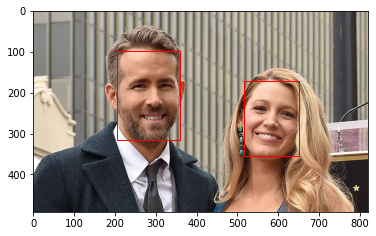

In [32]:
recognize_faces(filename, faces)

In [33]:
print("Total Number of faces detected : " ,len(faces))

Total Number of faces detected :  2


# **Encoding of the faces**

In [ ]:
pip install opencv-python

In [ ]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=7d57cc3245ee0dd1d16115411e9ba305f45d4ba83cffdafd5a4217411a9544e5
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
from imutils import paths
import face_recognition
import cv2
import os
import pickle

In [ ]:
!unzip Images.zip

Archive:  Images.zip
   creating: Images/Hugh_Jackman/
  inflating: Images/Hugh_Jackman/Hugh-Jackman.jpg  
  inflating: Images/Hugh_Jackman/penz65e_JJE32Jyp__1200x1642.jpg  
   creating: Images/Keanu_Reaves/
  inflating: Images/Keanu_Reaves/Keanu-Con-GQ-2019-050619.jpg  
  inflating: Images/Keanu_Reaves/keanu-reeves-crush-810x608-1561654179.jpg  
   creating: Images/Ryan_Reynolds/
  inflating: Images/Ryan_Reynolds/283233.jpg  
  inflating: Images/Ryan_Reynolds/Ryan-Reynolds.jpg  


In [ ]:
imagePaths = list(paths.list_images('Images'))
imagePaths

['Images/Hugh_Jackman/Hugh-Jackman.jpg',
 'Images/Hugh_Jackman/penz65e_JJE32Jyp__1200x1642.jpg',
 'Images/Ryan_Reynolds/Ryan-Reynolds.jpg',
 'Images/Ryan_Reynolds/283233.jpg',
 'Images/Keanu_Reaves/Keanu-Con-GQ-2019-050619.jpg',
 'Images/Keanu_Reaves/keanu-reeves-crush-810x608-1561654179.jpg']

In [34]:
knownEncodings = []
knownNames = []

In [35]:
for (i, imagePath) in enumerate(imagePaths):

    name = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    boxes = face_recognition.face_locations(rgb,model='hog')
    encodings = face_recognition.face_encodings(rgb, boxes)
    for encoding in encodings:
        knownEncodings.append(encoding)
        knownNames.append(name)

data = {"encodings": knownEncodings, "names": knownNames}
f = open("face_enc", "wb")
f.write(pickle.dumps(data))
f.close()

In [36]:
print(data)

{'encodings': [array([-0.06355931,  0.13785125,  0.12553367, -0.03594695, -0.12899911,
        0.05006956, -0.05780873, -0.03392579,  0.12543687, -0.09291474,
        0.15861148,  0.01767096, -0.28256881, -0.00490042, -0.04895911,
        0.1316928 , -0.22353601, -0.1879033 , -0.10519986, -0.10452566,
        0.03911411,  0.07404806, -0.0956959 , -0.01475072, -0.16351992,
       -0.28045124, -0.014257  , -0.05032955,  0.09206623, -0.17308033,
        0.03993241,  0.04247554, -0.14232647, -0.04149378,  0.02422378,
        0.07887417,  0.01041136, -0.10268   ,  0.2472004 ,  0.09143641,
       -0.23897073,  0.00095372,  0.03680514,  0.35294178,  0.13313471,
        0.03895719, -0.0043748 ,  0.0402343 ,  0.19857335, -0.19978777,
        0.08507009,  0.20682457,  0.17537972,  0.09766154,  0.06723527,
       -0.26422033,  0.07496008,  0.13844809, -0.2312135 ,  0.02487002,
        0.10016924, -0.12749532,  0.08767505,  0.02504357,  0.12431662,
       -0.00201748, -0.04045983, -0.16545066,  0.

# **Recognising detected faces**

In [37]:
print("Recognizing Faces : ")

for i in range(len(faces)):

  x1, y1, width, height = faces[i]['box']
  x2 = x1 + width
  y2 = y1 + height
  face_data=img_pixel[y1:y2, x1:x2]

  rgb = cv2.cvtColor(face_data, cv2.COLOR_BGR2RGB)
  encoding = face_recognition.face_encodings(rgb)
  
  matches = face_recognition.compare_faces(data["encodings"],encoding[0])
  name = "Unknown"

  # check to see if we have found a match
  if True in matches:
      if matches[0]==True:
        matchedIdx=0
      elif matches[2]==True:
        matchedIdx=2
      elif matches[4]==True:
        matchedIdx=4
      name = data["names"][matchedIdx]
  print(name)

Recognizing Faces : 
Ryan_Reynolds
Unknown


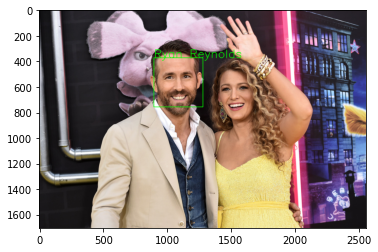

In [47]:
import face_recognition
import imutils
import pickle
import time
import cv2
import os

faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")

data = pickle.loads(open('face_enc', "rb").read())

image = plt.imread("test_img_2.jpg")

rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#convert image to Greyscale for haarcascade
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces_new = faceCascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(60, 60),flags=cv2.CASCADE_SCALE_IMAGE)
 
# the facial embeddings for face in input
encodings = face_recognition.face_encodings(rgb)
names = []

# loop over the facial embeddings incase
# we have multiple embeddings for multiple faces
for encoding in encodings:
    #Compare encodings with encodings in data["encodings"]
    #Matches contain array with boolean values and True for the embeddings it matches closely
    #and False for rest
    matches = face_recognition.compare_faces(data["encodings"],encoding)
    name = "Unknown"

    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {}

        for i in matchedIdxs:
            #Check the names at respective indexes we stored in matchedIdxs
            name = data["names"][i]

            #increase count for the name we got
            counts[name] = counts.get(name, 0) + 1

            name = max(counts, key=counts.get)
 
        names.append(name)

        for ((x, y, w, h), name) in zip(faces_new, names):

            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 4)
            cv2.putText(image, name, (x, y), cv2.FONT_HERSHEY_SIMPLEX,3.0, (0, 255, 0), 4)
    plt.imshow(image)

# Thank you!